In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = r"C:\Users\PC\Desktop\HandsOnMachineLeanring\HandsOnMachineLearning"
CHAPTER_ID = "svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Large Margin classification

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = iris["target"]

#just try to take 2 kinds of input to create 
#binary classifier
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [3]:
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Saving figure large_margin_classification_plot


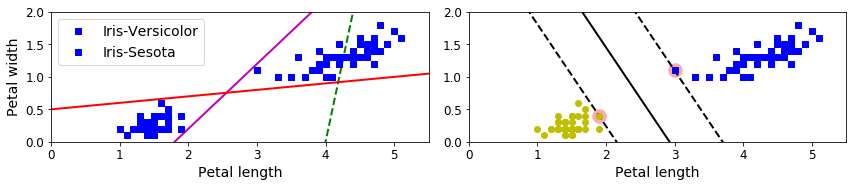

In [4]:
# Bad Models
x0 = np.linspace(0,5.5,200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0  + 0.5

def plot_svc_decision_boundary(svm_clf, xmin,xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    x0 = np.linspace(xmin,xmax,200)
    decision_boundary = -w[0]/w[1]*x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary +margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:,0],svs[:,1], s=180, facecolors= '#FFAAAA')
    plt.plot(x0,decision_boundary, "k-", linewidth = 2)
    plt.plot(x0,gutter_up,"k--",linewidth = 2)
    plt.plot(x0, gutter_down,"k--", linewidth=2)
    
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0,pred_1,"g--",linewidth=2)
plt.plot(x0,pred_2,"m-",linewidth=2)
plt.plot(x0,pred_3,"r-",linewidth=2)
plt.plot(X[:,0][y == 1], X[:,1][y == 1],"bs",label="Iris-Versicolor")
plt.plot(X[:,0][y == 0], X[:,1][y == 0],"bs",label="Iris-Sesota")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

# Sensitivity to feature scales

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.float64)

In [6]:
svc_clf = Pipeline((
            ("scaler" , StandardScaler()),
            ("linear_svc", LinearSVC(C = 1, loss="hinge")),
        ))

svc_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [7]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel = "linear", C = 100)
svm_clf.fit(Xs,ys)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

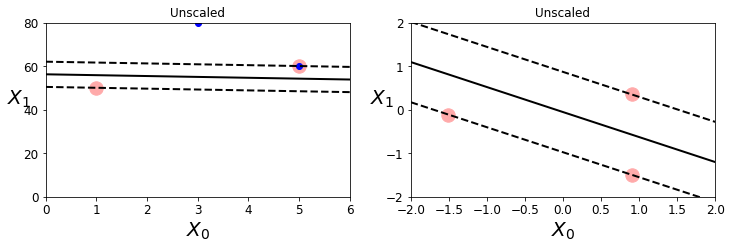

Saving figure Using Standard Scaler to improve the classification for SVM


<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize = (12,3.2))
plt.subplot(121)
plt.plot(Xs[:,0][ys == 1],Xs[:,1][ys == 1], "bo")
plt.plot(Xs[:,1][ys == 0],Xs[:,0][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf,0,6)
plt.xlabel("$X_0$", fontsize = 20)
plt.ylabel("$X_1$", fontsize = 20, rotation = False)
plt.title("Unscaled")
plt.axis([0,6,0,80])

## Try to draw after scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled,ys)
plt.subplot(122)
plt.plot(Xs[:,0][ys == 1],Xs[:,1][ys == 1], "bo")
plt.plot(Xs[:,1][ys == 0],Xs[:,0][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf,-2,2)
plt.xlabel("$X_0$", fontsize = 20)
plt.ylabel("$X_1$", fontsize = 20, rotation = False)
plt.title("Unscaled")
plt.axis([-2,2,-2,2])
plt.show()
save_fig("Using Standard Scaler to improve the classification for SVM")

# None Linear Classification

Saving figure higher_dimension_plot


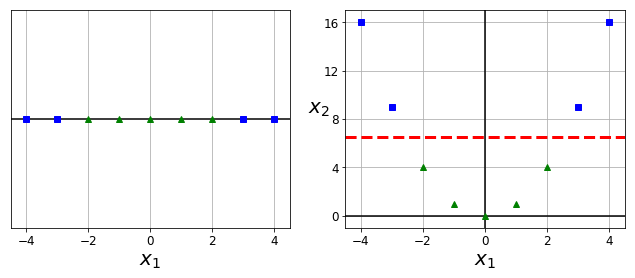

In [33]:
X1D = np.linspace(-4,4,9).reshape(-1,1)
X2D = np.c_[X1D,X1D**2]
y = np.array([0,0,1,1,1,1,1,0,0])


plt.figure(figsize = (11,4))
plt.subplot(121)
plt.grid(True,which = 'both')
plt.axhline(y = 0, color = 'k')
plt.plot(X1D[:,0][y==0], np.zeros(4),"bs")
plt.plot(X1D[:,0][y==1], np.zeros(5),"g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize = 20)
plt.axis([-4.5,4.5,-0.2,0.2])

plt.subplot(122)
plt.grid(True,which = 'both')
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.plot(X2D[:,0][y==0],X2D[:,1][y==0],"bs")
plt.plot(X2D[:,0][y==1],X2D[:,1][y==1], "g^")
plt.gca().get_yaxis().set_ticks([0,4,8,12,16])
plt.xlabel(r"$x_1$", fontsize = 20)
plt.ylabel(r"$x_2$", fontsize = 20, rotation = False)
plt.plot([-4.5,4.5],[6.5,6.5],"r--", linewidth = 3)
plt.axis([-4.5,4.5,-1 ,17])

save_fig("higher_dimension_plot", tight_layout = False)

In [34]:
from sklearn.datasets import make_moons

X, y = make_moons(noise = .15, random_state = 42)

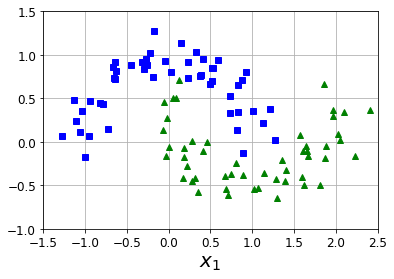

In [66]:
def plot_dataset(X,y,axes):
    plt.grid(True,which = 'both')
    plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
    plt.plot(X[:,0][y==1],X[:,1][y==1] ,"g^")
    plt.xlabel(r"$x_1$", fontsize = 20)
    plt.axis(axes)
    plt.show()
plot_dataset(X,y,[-1.5,2.5,-1,1.5])    

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 

In [57]:
polynomial_svm_clf  = Pipeline([
                    ("scaler", StandardScaler()),
                    ("poly_features", PolynomialFeatures(degree = 3)),
                    ("svm_clf", LinearSVC(C = 10, loss = "hinge", random_state = 42)),
        ])

polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

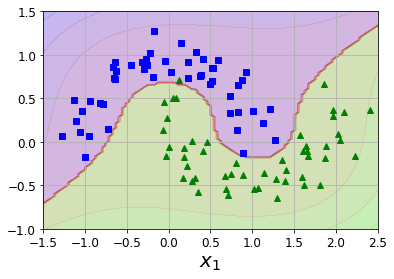

Saving figure moons_polynomial_svc_plot


<Figure size 432x288 with 0 Axes>

In [72]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

In [94]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [92]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

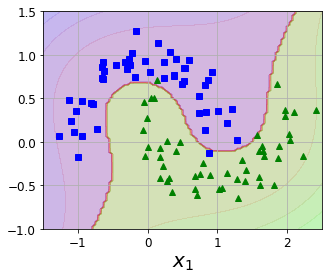

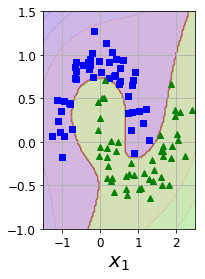

Saving figure moons_kernelized_polynomial_svc_plot


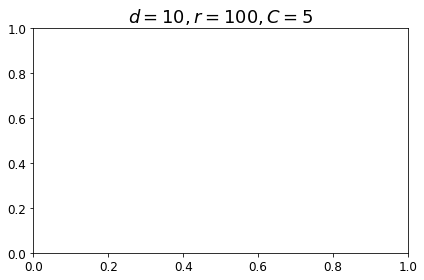

In [97]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

save_fig("moons_kernelized_polynomial_svc_plot")


Saving figure kernel_method_plot


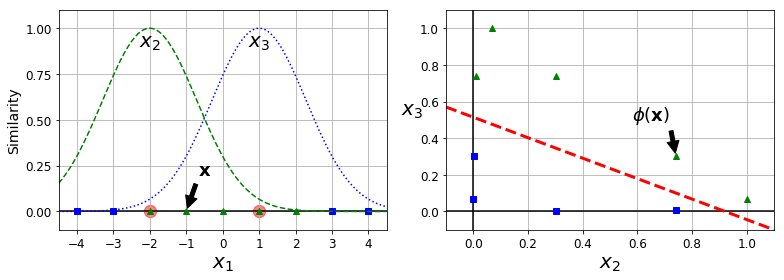

In [99]:
def gaussian_rbd(x,landmark,gamma):
    return np.exp(-gamma*np.linalg.norm(x - landmark, axis = 1)**2)

In [100]:
gamma = .3
x1s = np.linspace(-4.5,4.5,200).reshape(-1,1)
x2s = gaussian_rbf(x1s,-2,gamma)
x3s = gaussian_rbf(x1s,1,gamma)

In [101]:
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

Saving figure kernel_method_plot


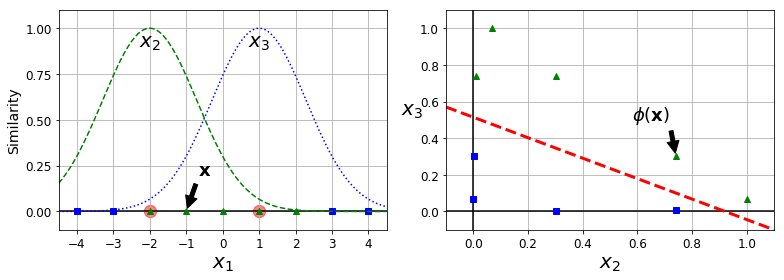

In [102]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.grid(True, which = 'both')
plt.axhline(y = 0, color = 'k')
plt.scatter(x = [-2,1], y = [0,0], s = 150, alpha = 0.5, c = "red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

In [103]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


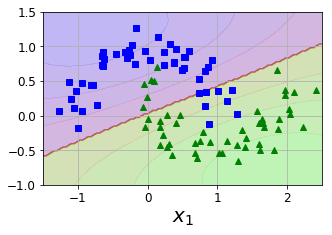

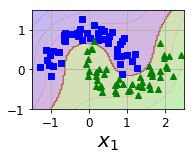

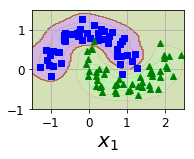

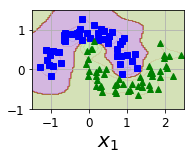

Saving figure moons_rbf_svc_plot


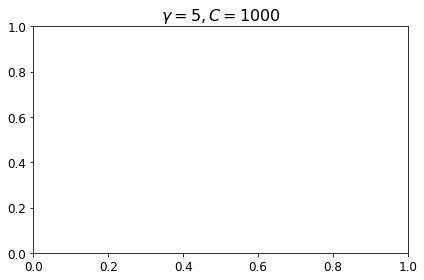

In [108]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

save_fig("moons_rbf_svc_plot")
plt.show()